In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
import seaborn as sns
 

# Data Preprocessing


**Data processing is a vital step in Model Building as it cleans out redundant data, noisy data and also handles missing data. First we load the data and then look at the data types to get insights then we handle missing values if there are or not. Over here we dont have so moving forward we drop the id feature as it is a identifier and isn't required. Plotting 500 features on a scatter plot is impossible so we can plot heatmap to identify the correlation among fetaures variables so that we can perform PCA or principal component analysis simply meaning dimensional reduction while retaining only those faeture variables which distribute 100% of the data.**

In [2]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\TASK-ML-INTERN.csv")

In [3]:
df

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200.0
496,imagoai_corn_496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0.0
497,imagoai_corn_497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0.0
498,imagoai_corn_498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [6]:
df.isnull().values.any()

False

In [7]:
new_df = df.drop(['hsi_id','vomitoxin_ppb'], axis=1)

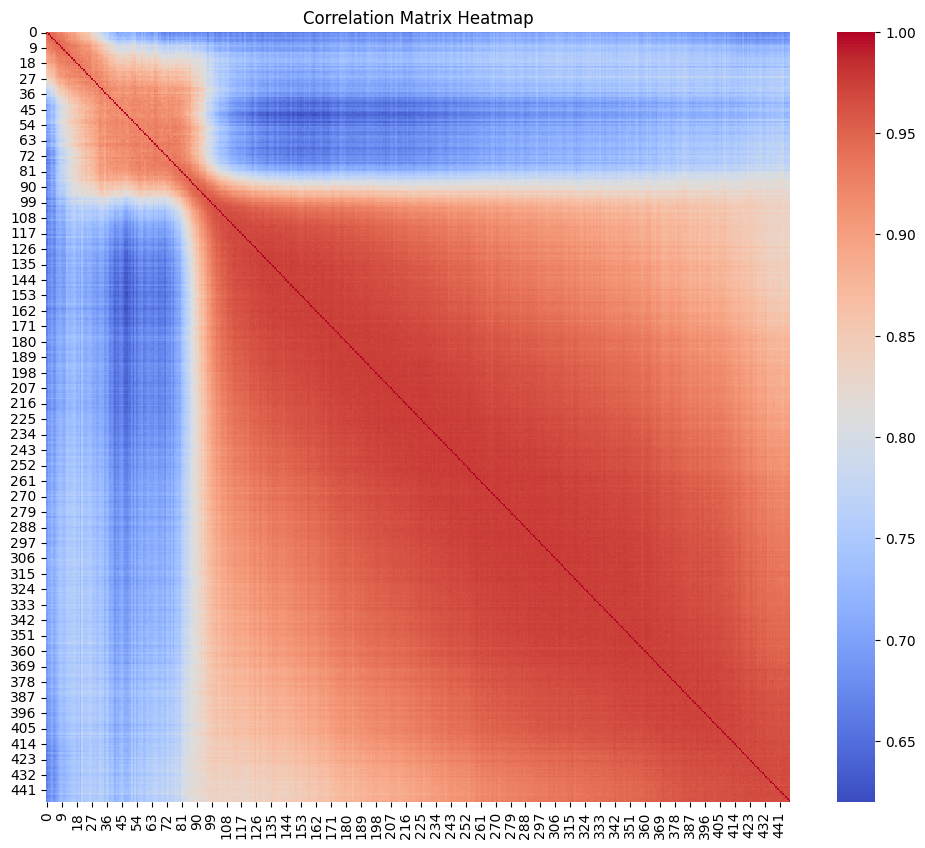

In [8]:
# Calculate the correlation matrix
corr_matrix = new_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm') # `annot=True` to show correlation values, but can be overwhelming
plt.title('Correlation Matrix Heatmap')
plt.show()

# Data Reduction

## As per the probelm statement we have chosen PCA to reduce dimensionality to only those features which contribute most of the data but as compared to VIF, it measures the magnitude of multicollinearity among predictor variables but does not inherently reduce dimensionality.

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

 
 

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(new_df)

# Apply PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Reduced to {pca.n_components_} components")


# Print variance explained by each component
print("Variance Explained by Each Component:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.2%}")

Reduced to 3 components
Variance Explained by Each Component:
PC1: 87.08%
PC2: 5.85%
PC3: 2.11%


Text(0, 0.5, 'PC3 (2.11% variance)')

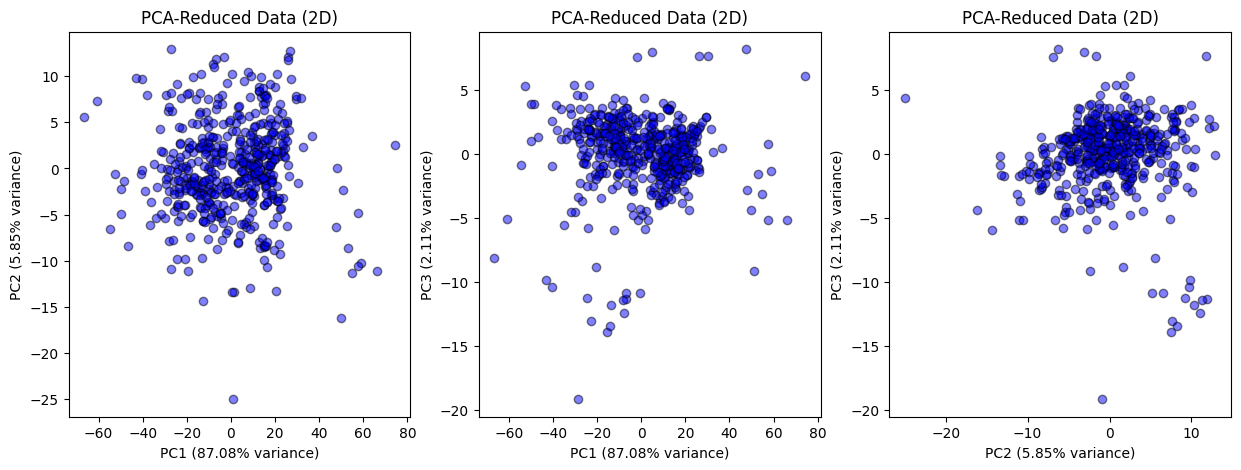

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
#plot 1
ax1.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, c='blue', edgecolor='k')
ax1.set_title('PCA-Reduced Data (2D)')
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax2.scatter(X_pca[:, 0], X_pca[:, 2], alpha=0.5, c='blue', edgecolor='k')
ax2.set_title('PCA-Reduced Data (2D)')
ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax2.set_ylabel(f'PC3 ({pca.explained_variance_ratio_[2]:.2%} variance)')
ax3.scatter(X_pca[:, 1], X_pca[:, 2], alpha=0.5, c='blue', edgecolor='k')
ax3.set_title('PCA-Reduced Data (2D)')
ax3.set_xlabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax3.set_ylabel(f'PC3 ({pca.explained_variance_ratio_[2]:.2%} variance)')
 


# # Plot PCA results
# plt.figure(figsize=(10, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, c='blue', edgecolor='k')
# plt.title('PCA-Reduced Data (2D)')
# plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
# plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
 
# plt.grid(True)
# plt.show()

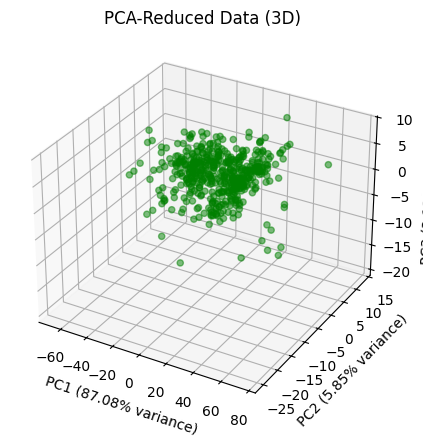

In [11]:
# Apply PCA for 3D visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Plot 3D PCA results
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], alpha=0.5, c='green')
ax.set_title('PCA-Reduced Data (3D)')
ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%} variance)')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%} variance)')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%} variance)')
plt.show()

In [12]:
 
y = df['vomitoxin_ppb']

In [13]:
print("Original dataset shape:", new_df.shape)  


Original dataset shape: (500, 448)


In [14]:
y

0      1100.0
1      1000.0
2      1300.0
3      1300.0
4       220.0
        ...  
495    1200.0
496       0.0
497       0.0
498       0.0
499    1400.0
Name: vomitoxin_ppb, Length: 500, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [16]:
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (400, 3)
Testing Set Shape: (100, 3)


In [17]:
# Reshape train data
X_train_pca_3d = X_train.reshape(X_train.shape[0], 3, 1, 1, 1)  # (400, 3, 1, 1, 1)

# Reshape test data
X_test_pca_3d = X_test.reshape(X_test.shape[0], 3, 1, 1, 1)     # (100, 3, 1, 1, 1)

print("Train shape:", X_train_pca_3d.shape)  # e.g., (n_samples, 447, 1, 1)
print("Test shape:", X_test_pca_3d.shape)

Train shape: (400, 3, 1, 1, 1)
Test shape: (100, 3, 1, 1, 1)


In [ ]:
pip show keras


In [18]:
 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV 

# Model Building

## For the given problem statement the model chosen is 3d CNN model which is best fit for processing hyperspectral data compared to other cnn models such as 2d, 1d. Also to optimize the model, hyperparamter tuning was done using randomsearch giving us best parameters for the model.

In [19]:


# Define model creation function
def create_model(learning_rate=0.001, dropout_rate=0.3, num_filters=32):
    model = Sequential([
        Conv3D(num_filters, (3, 1, 1), activation='relu', input_shape=(3, 1, 1, 1)),
        MaxPooling3D((1, 1, 1)),
        Dropout(dropout_rate),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='linear')  # Regression output
    ])
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mse', 
        metrics=['mae']
    )
    return model

# Use KerasRegressor with hyperparameter tuning
model = KerasRegressor(model=create_model, verbose=0)

param_dist = {
    'model__learning_rate': [0.0001, 0.001, 0.01],
    'model__dropout_rate': [0.2, 0.3, 0.4, 0.5],
    'model__num_filters': [16, 32, 64, 128],
    'batch_size': [16, 32, 64],
    'epochs': [30, 50, 100]
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1,
    error_score='raise'
)

random_search.fit(X_train_pca_3d, y_train)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Best MSE: {-random_search.best_score_:.4f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\ASUS\anaconda3\envs\test_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters: {'model__num_filters': 128, 'model__learning_rate': 0.01, 'model__dropout_rate': 0.3, 'epochs': 30, 'batch_size': 64}
Best MSE: 81886736.7772


In [20]:
history = model.fit(
    X_train_pca_3d, 
    y_train,
    validation_data=(X_test_pca_3d, y_test),
    epochs=100,
    batch_size=16,
    verbose=1
)

 


Epoch 1/100


C:\Users\ASUS\anaconda3\envs\test_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 245937312.0000 - mae: 4051.9617 - val_loss: 298935392.0000 - val_mae: 4408.0840
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 177162192.0000 - mae: 3166.7400 - val_loss: 298881280.0000 - val_mae: 4404.5635
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 130533144.0000 - mae: 2882.7849 - val_loss: 298801120.0000 - val_mae: 4399.6514
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 181252960.0000 - mae: 3168.6531 - val_loss: 298683552.0000 - val_mae: 4392.7178
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 97331136.0000 - mae: 2772.9006 - val_loss: 298514816.0000 - val_mae: 4383.2007
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 141397952.0000 - mae: 2994.1943 - val_loss: 298239904.0000 - val_mae: 4369.5762
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 258099072.0000 - mae: 3819.5308 - val_loss: 297843552.0000 - val_mae: 4351.4746
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 

In [40]:
from sklearn.metrics import mean_absolute_error
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

In [41]:
mae

4218.134140300751

In [22]:
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
# Get predictions on test data
y_pred = model.predict(X_test_pca_3d)  # Use your reshaped test data

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f} ppb")  # Assuming vomitoxin is measured in parts per billion

R² Score: 0.5198
RMSE: 11585.3865 ppb


In [34]:
print(type(y_pred))  # Should print <class 'pandas.core.series.Series'>


<class 'numpy.ndarray'>


In [35]:
 
y_test_array = y_test.to_numpy()
 

In [37]:
# y_test_flat = y_test.flatten()
# # y_pred_flat = y_pred.flatten()

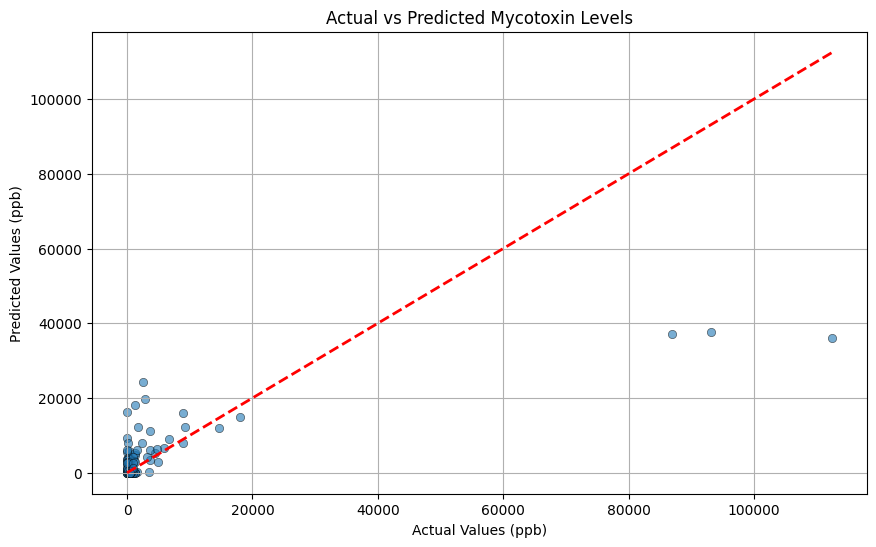

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Mycotoxin Levels')
plt.xlabel('Actual Values (ppb)')
plt.ylabel('Predicted Values (ppb)')
plt.grid(True)
plt.show()

### Keys for Improvement
Monitor Training Progress:
Use callbacks like EarlyStopping and ReduceLROnPlateau to monitor training progress and prevent overfitting.

Cross-Validation:
Use techniques like K-fold cross-validation to evaluate your model's generalization ability.

Model Interpretability:
Use techniques like feature importance or SHAP values to understand how your model makes predictions.